<a href="https://colab.research.google.com/github/MuleupNguyen/ML_NguyenDuLap_20130302/blob/main/Lab_7_20130302_NguyenDuLap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [2]:
# code
# code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn import svm
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ThuVienPy/Lab_7'
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score

Mounted at /content/gdrive
/content/gdrive/MyDrive/ThuVienPy/Lab_7


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris = datasets.load_iris()
X = iris.data
y = iris.target
clfSVM = svm.SVC(kernel='sigmoid', random_state=0)
scoresSVM = cross_validate(clfSVM, X, y, scoring='accuracy', cv=10)
print(sorted(scoresSVM.keys()))
print(np.mean(scoresSVM['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
clfRandomKBest=RandomForestClassifier(n_estimators=100)
X_new = SelectKBest(chi2, k=4).fit_transform(X,y)
scoresRandomForest = cross_validate(clfRandomKBest, X_new, y, scoring='accuracy', cv=10)
print(sorted(scoresRandomForest.keys()))
print(np.mean(scoresRandomForest['test_score']))


['fit_time', 'score_time', 'test_score']
0.5402948479205463


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(X)
clusters = kmeans.predict(X)

print(kmeans.cluster_centers_.shape)
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 #print(mask)
 labels[mask] = mode(y[mask])[0]
 #print(labels[mask])
kMeanAccuracy = accuracy_score(y, labels)
kMeanAccuracy

(10, 64)


<ipython-input-41-a38108ddae81>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


0.7935447968836951

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
kMeanRecision = precision_score(y, labels, average='weighted')
kMeanRecall = recall_score(y, labels, average='weighted')
kMeanF1 = f1_score(y, labels, average='weighted')

#randomforest
clfRandomforest=RandomForestClassifier(n_estimators=100)
scoresRecal = cross_validate(clfRandomforest, X, y, scoring='recall_macro', cv=10)
randomRecall = np.mean(scoresRecal['test_score'])

scoresF1 = cross_validate(clfRandomforest, X, y, scoring='f1_macro', cv=10)
randomF1 = np.mean(scoresF1['test_score'])

scoresAccuracy = cross_validate(clfRandomforest, X, y, scoring='accuracy', cv=10)
randomAccuracy = np.mean(scoresAccuracy['test_score'])

scoresRecision = cross_validate(clfRandomforest, X, y, scoring='precision_macro', cv=10)
randomRecision = np.mean(scoresRecision['test_score'])

#Naive Bayes
clfNai = GaussianNB()
scoresRecalNai = cross_validate(clfNai, X, y, scoring='recall_macro', cv=10)
naiRecall = np.mean(scoresRecalNai['test_score'])

scoresF1Nai = cross_validate(clfNai, X, y, scoring='f1_macro', cv=10)
naiF1 = np.mean(scoresF1Nai['test_score'])

scoresAccuracyNai = cross_validate(clfNai, X, y, scoring='accuracy', cv=10)
naiAccuracy = np.mean(scoresAccuracyNai['test_score'])

scoresRecisionNai = cross_validate(clfNai, X, y, scoring='precision_macro', cv=10)
naiRecision = np.mean(scoresRecisionNai['test_score'])

t = PrettyTable(['algorithms', 'f1', 'recall', 'accuracy', 'precision'])
t.add_row(['K-MEAN', kMeanF1, kMeanRecall, kMeanAccuracy, kMeanRecision])
t.add_row(['Randomforest', randomF1, randomRecall, randomAccuracy, randomRecision])
t.add_row(['Naive Bayes', naiF1, naiRecall, naiAccuracy, naiRecision])
print(t)

+--------------+--------------------+--------------------+--------------------+--------------------+
|  algorithms  |         f1         |       recall       |      accuracy      |     precision      |
+--------------+--------------------+--------------------+--------------------+--------------------+
|    K-MEAN    | 0.7900231135349977 | 0.7935447968836951 | 0.7935447968836951 | 0.8044423233177751 |
| Randomforest | 0.9466889952801759 | 0.9448538011695906 | 0.951582867783985  | 0.9530677947241584 |
| Naive Bayes  | 0.8090382615408214 | 0.8114189886480908 | 0.8113904407200497 | 0.8480837289405493 |
+--------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
#

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
cluster.labels_



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





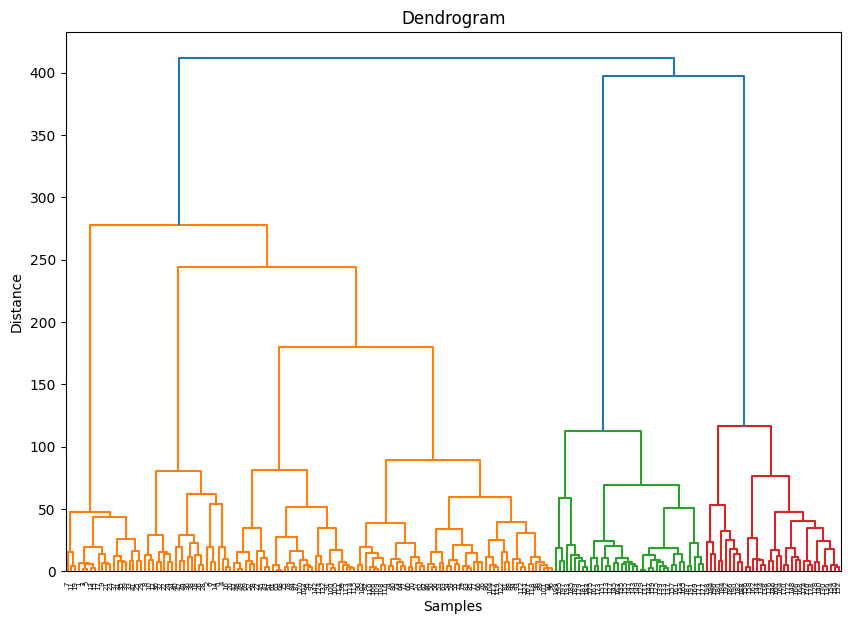

In [3]:
#code
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

data = pd.read_csv('shopping-data.csv')
data = data.drop(['CustomerID', 'Genre'], axis=1)

Z = linkage(data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

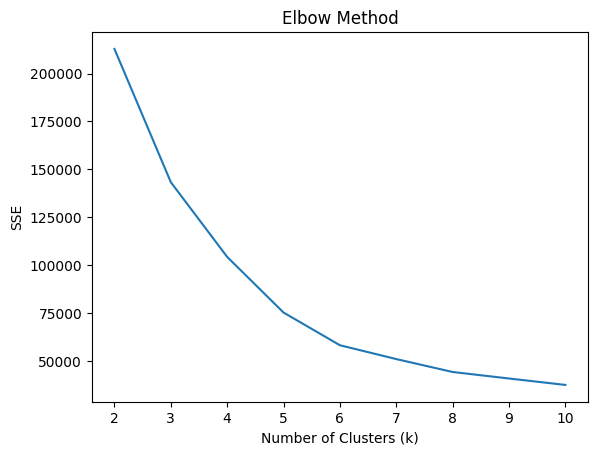

In [5]:
#code
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

*   3.3. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

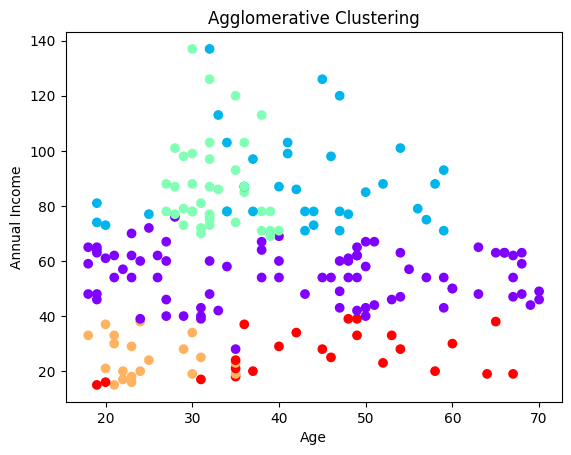

In [7]:
#code
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_clusters = agg_clustering.fit_predict(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=agg_clusters, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.